# fundamental 22

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


In [2]:
def binary_step(x,threshold=0):
    return 0 if x<threshold else 1

In [ ]:
class Perceptron(object):
    #초기화 진행 단계 
    def __init__(self,input_size,activation_ftn,threshold=0,learning_rate=0.01):
        self.weights =np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = activation_ftn#np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold
        
    def train(self,trainig_inputs,labels,epochs=100,verbose=1):
        for epoch in range(epochs):
            for inputs,label in zip(training_inputs,labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label-prediction) #원래는 gradient를 곱해줘야 한다. 
                self.bias += self.learning_rate * (label-prediction)
            
                if verbose==1: #매 에포크 결과 출력
                    pred = self.__call__(training_inputs)
                    accuracy = np.sum(pred==labels)/len(pred)
                    print(f'{epoch}th epoch, accuracy : {accuracy}')
                    
            if verbose==0: #최종 에포크 결과물만 출력
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels) / len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
    def get_weights(self):
        return self.weights,self.bias
    def __call__(self,inputs):
        summation = np.dot(inputs,self.weights) + self.bias #순전파 계산
        return self.activation_ftn(summation,self.threshold) #활성화함수 이용해서 return값 계산
                

In [ ]:
def scatter_plot(plt,X,y,threshold=0,three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y<=threshold,y)
        area

In [9]:
threshold = 0
X = np.array([[0,0],[1,0],[0,1],[1,1]])
or_y = np.array([x1 | x2 for x1,x2 in X])
and_y = np.array([x1 & x2 for x1,x2, in X])
xor_y = np.array([x1 ^ x2 for x1,x2, in X])

# 22-8. 활성화 함수의 종류 (2) 선형 활성화 함수

In [6]:
import tensorflow as tf
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,),dtype='float64'),
    tf.keras.layers.Dense(1,activation='linear')
])
or_linear_model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
or_linear_model.summary()

and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,),dtype='float64'),
    tf.keras.layers.Dense(1,activation='linear')
])
and_linear_model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
and_linear_model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


2023-03-18 21:26:31.474833: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
or_linear_model.fit(X,or_y,epochs=1000,verbose=0)
and_linear_model.fit(X,and_y,epochs=1000,verbose=0)
print('done')

2023-03-18 21:28:18.809294: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


done


In [11]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

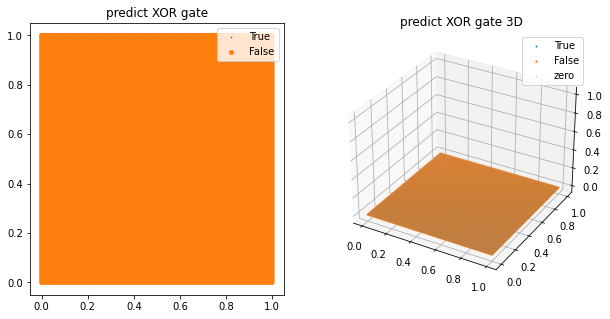

In [15]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

# 22-9. 활성화 함수의 종류 (3) 비선형 활성화 함수-시그모이드, Softmax

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 default 값을 설정해주세요
    return 0 if x<threshold else 1

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)] #input x 생성
    y = [function(y) for y in X] #그 input값으로 계단함수를 통과한 y값 생성
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

TypeError: 'numpy.float64' object is not callable

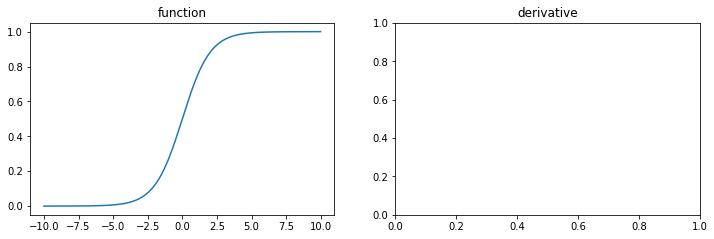

In [18]:
img_path = './jindo_dog.jpg'

def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)(1-sigmoid(x))
ax = plot_and_visulize(img_path,sigmoid,dev_sigmoid)
ax.show()

In [19]:
# 수치 미분
def num_derivative(x, function):
    h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

# 두 그래프의 차이
diff_X = [-5+x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

TypeError: 'numpy.float64' object is not callable

# 22-10. 활성화 함수의 종류 (4) 비선형 활성화 함수-하이퍼볼릭 탄젠트

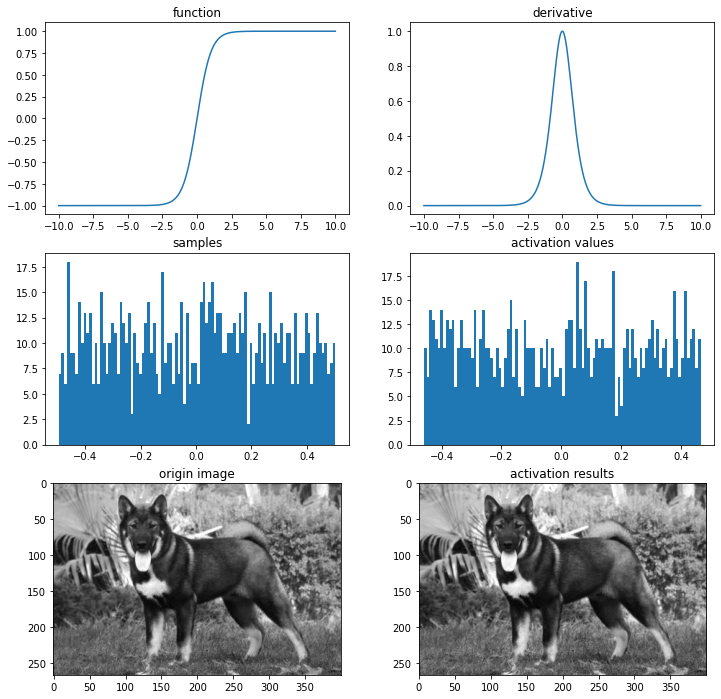

In [21]:
import os
img_path = './jindo_dog.jpg'

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()
    